# Problem Statement 2:
An online retail store is trying to understand the various customer purchase patterns for their
firm, you are required to give enough evidence based insights to provide the same.

In [1]:
#Import Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("E:\pankaj\ds project\Project1\OnlineRetail.csv", encoding='unicode_escape')#Load Data

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
data['CustomerID']=data['CustomerID'].astype('object') #change it to object format because during mathematical operations don’t want to affect this column


In [7]:
data.isna().sum()#check null Values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
data=data.dropna()#Drop null Values

In [9]:
data.shape

(406829, 8)

# 1. Using the above data, find useful insights about the customer purchasing history that can be an added advantage for the online retailer

In [10]:
data['Amount']=data['Quantity']*data['UnitPrice']#create Amount Column

In [11]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


Total Shopping By Individual Customer

In [12]:
data1=data.copy()

In [13]:
customerbuytotal=data1.groupby('CustomerID')['Amount'].sum().reset_index()

In [14]:
customerbuy=pd.DataFrame(data=customerbuytotal)

In [15]:
customerbuy.sort_values('Amount',ascending=False)#Individual Customers Total Amount Purchase History

,CustomerID,Amount
1703,14646.0,279489.02
4233,18102.0,256438.49
3758,17450.0,187482.17
1895,14911.0,132572.62
55,12415.0,123725.45
...,...,...
125,12503.0,-1126.00
3870,17603.0,-1165.30
1384,14213.0,-1192.20
2236,15369.0,-1592.49


CustomerID=14646.0 Paid Highest Amount

In [16]:
transactions=data1.groupby('CustomerID')['InvoiceNo'].count().reset_index()

In [17]:
pd.DataFrame(data=transactions).sort_values('InvoiceNo',ascending=False)#Individual Customers Total Transaction History

,CustomerID,InvoiceNo
4042,17841.0,7983
1895,14911.0,5903
1300,14096.0,5128
330,12748.0,4642
1674,14606.0,2782
...,...,...
1318,14119.0,1
1046,13747.0,1
2400,15590.0,1
2379,15562.0,1


Customer Id =17841.0 Done Highest Transaction

In [18]:
countrybuy=data1.groupby('Country')['Amount'].sum()

In [19]:
pd.DataFrame(data=countrybuy).sort_values('Amount',ascending=False)#Individual Country Total Amount Purchase History

,Amount
Country,
United Kingdom,6767873.394
Netherlands,284661.540
EIRE,250285.220
Germany,221698.210
France,196712.840
Australia,137077.270
Switzerland,55739.400
Spain,54774.580
Belgium,40910.960


People From United Kingdom paid highest amount

In [20]:
product=data1.groupby('Description')['Quantity'].sum()

In [21]:
pd.DataFrame(data=product).sort_values('Quantity',ascending=False)#Quantity Of buying each item

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409
...,...
PINK POODLE HANGING DECORATION,-12
CRUK Commission,-16
ASSORTED TUTTI FRUTTI ROUND BOX,-24


WORLD WAR 2 GLIDERS ASSTD DESIGNS is Favorite Product of Customers

In [22]:
data1['InvoiceDate']=pd.to_datetime(data1['InvoiceDate'])#change InvoiceDate to datetime format

In [23]:
maxdate=data1['InvoiceDate'].max()

In [24]:
data1['LastBuyBefore']=(maxdate-data1['InvoiceDate']).dt.days

In [25]:
lastbuy=data1.groupby('CustomerID')['LastBuyBefore'].min().reset_index()

In [26]:
pd.DataFrame(data=lastbuy).sort_values('LastBuyBefore',ascending=False)#Last Item Purchase Day of individual customer

,CustomerID,LastBuyBefore
1046,13747.0,373
3129,16583.0,373
4096,17908.0,373
1764,14729.0,373
359,12791.0,373
...,...,...
301,12713.0,0
698,13263.0,0
105,12476.0,0
900,13536.0,0


In [27]:
d1=pd.merge(customerbuytotal,transactions, on='CustomerID',how='inner')#merging columns

In [28]:
d2=pd.merge(d1,lastbuy, on='CustomerID', how='inner')#merging columns
d2.columns=['CustomerID','Amount','Transactions','LastBuyBefore']

In [29]:
d2['CustomerID']=d2['CustomerID'].astype('object')

<AxesSubplot:>

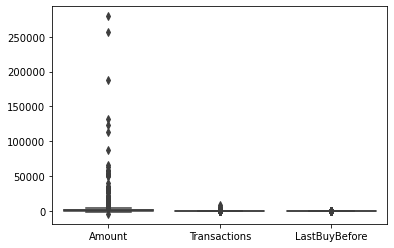

In [30]:
sns.boxplot(data=d2[['Amount','Transactions','LastBuyBefore']])

Dealing with Outliers

In [31]:
Q1=d2.quantile(0.25)
Q3=d2.quantile(0.75)
IQR=Q3-Q1
newdata=d2[~((d2<(Q1-1.5*IQR))|(d2>(Q3+1.5*IQR))).any(axis=1)]

In [32]:
newdata1=newdata[['Amount','Transactions','LastBuyBefore']]
newdata1

,Amount,Transactions,LastBuyBefore
0,0.00,2,325
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
5,1545.41,95,35
...,...,...,...
4366,173.90,9,73
4367,180.60,10,277
4368,80.82,7,180
4369,176.60,13,7


In [33]:
#Scaling Data to same scale
sc=StandardScaler()
scaledata=sc.fit_transform(newdata1)

In [34]:
scaledata

array([[-1.06882703, -1.02886055,  2.58373034],
       [ 1.24864008, -0.43762647, -0.18337185],
       [ 1.19746146,  0.41864358, -0.8007333 ],
       ...,
       [-0.96461296, -0.92692364,  0.98520517],
       [-0.84110859, -0.80459935, -0.92200073],
       [ 1.30027002,  0.35748143, -0.53614982]])

# 2. Segment the customers based on their purchasing behavior

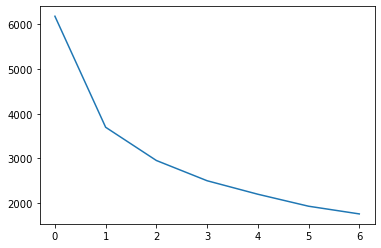

In [35]:
#Elbow Method to get number of Clusters
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(scaledata)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

In [36]:
#Fitting kmeans Algorithm as from Elbow Method We get optimal number of clusters=3
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaledata)

KMeans(n_clusters=3)

In [37]:
kmeans.labels_

array([2, 1, 0, ..., 2, 1, 0])

In [38]:
newdata['ClusterID']=kmeans.labels_
newdata.head()        #We Successfully Segmented Customers on there purchase Behavior

,CustomerID,Amount,Transactions,LastBuyBefore,ClusterID
0,12346.0,0.00,2,325,2
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2
5,12352.0,1545.41,95,35,0


In [39]:
#Model Evaluation
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [40]:
index = range(2, 7)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    labels = kmeans.fit_predict(scaledata)
    print('Inertia at K =', i, ':', kmeans.inertia_)
    print("Silhouette Coefficient: %0.3f" % silhouette_score(scaledata, labels))
    print("Calinski-Harabasz Index: %0.3f" % calinski_harabasz_score(scaledata, labels))
    print("Davies-Bouldin Index: %0.3f" % davies_bouldin_score(scaledata, labels))

Inertia at K = 2 : 6180.227562135574
Silhouette Coefficient: 0.429
Calinski-Harabasz Index: 2835.834
Davies-Bouldin Index: 0.974
Inertia at K = 3 : 3698.4417069165675
Silhouette Coefficient: 0.449
Calinski-Harabasz Index: 3595.068
Davies-Bouldin Index: 0.797
Inertia at K = 4 : 2955.3969611454077
Silhouette Coefficient: 0.403
Calinski-Harabasz Index: 3304.686
Davies-Bouldin Index: 0.955
Inertia at K = 5 : 2502.8963609694474
Silhouette Coefficient: 0.409
Calinski-Harabasz Index: 3090.971
Davies-Bouldin Index: 0.922
Inertia at K = 6 : 2201.1980129326216
Silhouette Coefficient: 0.363
Calinski-Harabasz Index: 2911.060
Davies-Bouldin Index: 0.962


In [41]:
#From Above Stats For k=3 We get Good Results as Silhouette Coefficient is high and Davies-Bouldin Index lower

<AxesSubplot:xlabel='ClusterID', ylabel='Amount'>

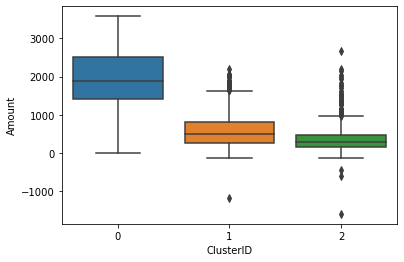

In [42]:
#Boxplot for ClusterId Vs Amount
sns.boxplot(x='ClusterID', y='Amount', data=newdata)

<AxesSubplot:xlabel='ClusterID', ylabel='Transactions'>

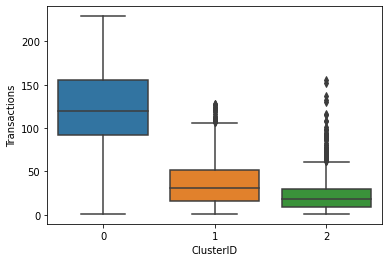

In [43]:
#Boxplot for ClusterId Vs Transactions
sns.boxplot(x='ClusterID', y='Transactions', data=newdata)

<AxesSubplot:xlabel='ClusterID', ylabel='LastBuyBefore'>

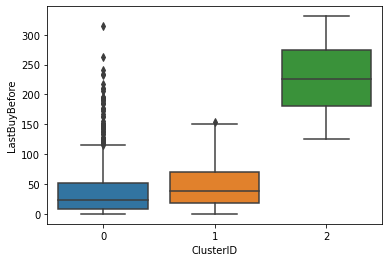

In [44]:
#Boxplot for ClusterId Vs LastBuyBefore
sns.boxplot(x='ClusterID', y='LastBuyBefore', data=newdata)